In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import scipy.io as sio

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/CSE512/HW2'

Mounted at /content/gdrive
/content/gdrive/My Drive/CSE512/HW2


In [ ]:

##In case you were wondering how I prepared the data
"""
#load data

#data source: https://finance.yahoo.com/quote/%5EGSPC/history/

weeks_after_start = []
dewtemp = []

f = open('localweather.csv')
header = f.readline()
idx = header.split(',').index('HourlyDewPointTemperatureC')
startdate = None
line = f.readline()

while len(line) > 0:
    splitline = line.split(',')

    #load day
    dt = splitline[5].split(' ')
    d = dt[0].split('-')
    t = dt[1].split(':')

    d = int(d[0]),int(d[1]),int(d[2])
    t = int(t[0]), int(t[1])
    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])
    if startdate is None:
        startdate = copy.deepcopy(d)

    if  len(splitline[idx].strip('')) == 0:
        line = f.readline()
        continue
    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)

    dewtemp.append(float(splitline[idx]))

    line = f.readline()

weeks_after_start, dewtemp = np.array(weeks_after_start), np.array(dewtemp)
plt.plot(weeks_after_start, dewtemp)

plt.xlabel('Weeks after first reading')
plt.ylabel('Dew point temp (C)')
plt.tight_layout()
plt.savefig('polyfit_hw1_0.png')
plt.savefig('polyfit_hw1_0.eps')
N = len(weeks_after_start)

sio.savemat('weatherDewTmp.mat',{'weeks':weeks_after_start,'dew':dewtemp})
print N
"""



"\n#load data\n\n#data source: https://finance.yahoo.com/quote/%5EGSPC/history/\n\nweeks_after_start = []\ndewtemp = []\n\nf = open('localweather.csv')\nheader = f.readline()\nidx = header.split(',').index('HourlyDewPointTemperatureC')\nstartdate = None\nline = f.readline()\n\nwhile len(line) > 0:\n    splitline = line.split(',')\n    \n    #load day\n    dt = splitline[5].split(' ')\n    d = dt[0].split('-')\n    t = dt[1].split(':')\n    \n    d = int(d[0]),int(d[1]),int(d[2])    \n    t = int(t[0]), int(t[1])\n    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])\n    if startdate is None:\n        startdate = copy.deepcopy(d)\n    \n    if  len(splitline[idx].strip('')) == 0: \n        line = f.readline()\n        continue\n    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)\n    \n    dewtemp.append(float(splitline[idx]))\n\n    line = f.readline()\n\nweeks_after_start, dewtemp = np.array(weeks_after_start),

742


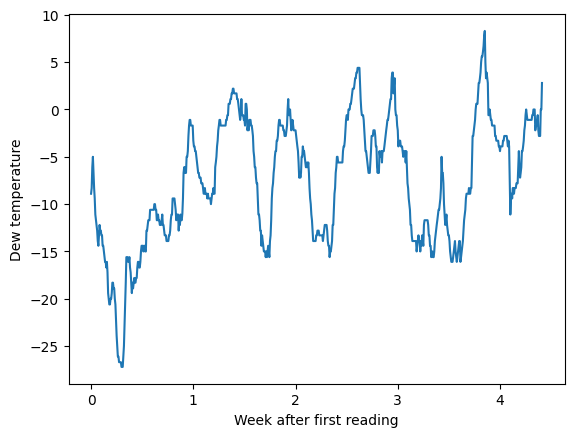

In [3]:
#This cell forms the mat file you were already given
data = sio.loadmat('weatherDewTmp.mat')
weeks_after_start = data['weeks'][0]
dewtemp = data['dew'][0]
N = len(dewtemp)
plt.plot(weeks_after_start, dewtemp)
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
print(N)

Check number:  1.3412701796105981


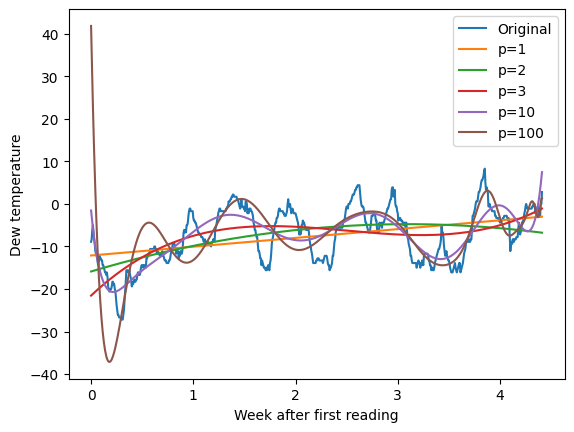

In [4]:
def packX(z,poly_order):
    X = np.zeros((len(z),poly_order+1))
    for i in range(poly_order + 1):
        X[:, i] = np.array(z) ** i
    return X


def solveLinearSystem(X,y):
    theta = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, y))
    return theta
#ii.
# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveLinearSystem(X,y)
print('Check number: ', np.sum(theta))

#iii.
degrees = [1, 2, 3, 10, 100]
plt.plot(weeks_after_start, dewtemp, label='Original')
for p in degrees:
    X = packX(weeks_after_start, p)
    theta = solveLinearSystem(X, dewtemp)
    y = np.matmul(X, theta)
    plt.plot(weeks_after_start, y, label=f'p={p}')
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
plt.legend()
plt.show()


Check number:  1.2061712965226583


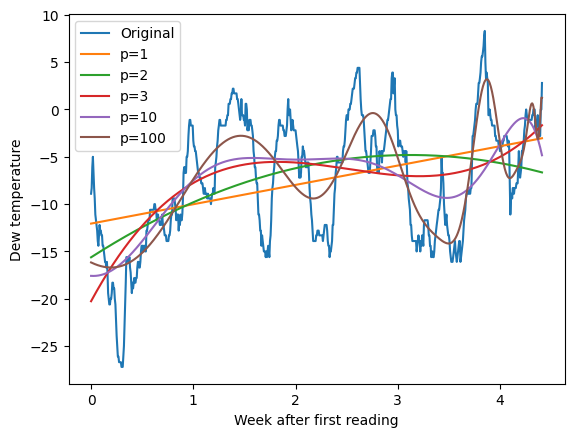

In [5]:
def solveRidgeRegressionSystem(X,y,rho):
    p = X.shape[1]
    pI = np.eye(p)
    theta = np.linalg.solve(np.matmul(X.T, X)+pI*rho, np.matmul(X.T, y))
    return theta
#ii.
# TEST SCRIPT. DO NOT MODIFY!
X = packX(range(100),3)
y = np.sqrt(np.array(range(100)))
theta = solveRidgeRegressionSystem(X,y,1)
print('Check number: ', np.sum(theta))

#iii.
plt.plot(weeks_after_start, dewtemp, label='Original')
for p in degrees:
    X = packX(weeks_after_start, p)
    theta = solveRidgeRegressionSystem(X, dewtemp, 1.0)
    y = np.matmul(X, theta)
    plt.plot(weeks_after_start, y, label=f'p={p}')
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
plt.legend()
plt.show()

In [6]:
#c. ii.
rho_values = [0, 742, 7420, 74200]  # ρ = 0, m, 10m, 100m
p_values = [1, 2, 5, 10]

for p in p_values:
    X = packX(weeks_after_start, p)
    pI = np.eye(X.shape[1])
    for rho in rho_values:
        Q = np.matmul(X.T, X) + pI*rho  # Q = X^T X + ρ I
        eigenvalues = np.linalg.eigvals(Q)
        print(f'Condition number for p={p}, ρ={rho}: {np.max(eigenvalues) / np.min(eigenvalues):.2e}')

Condition number for p=1, ρ=0: 3.25e+01
Condition number for p=1, ρ=742: 6.75e+00
Condition number for p=1, ρ=7420: 1.69e+00
Condition number for p=1, ρ=74200: 1.07e+00
Condition number for p=2, ρ=0: 1.48e+03
Condition number for p=2, ρ=742: 7.91e+01
Condition number for p=2, ρ=7420: 9.20e+00
Condition number for p=2, ρ=74200: 1.82e+00
Condition number for p=5, ρ=0: 7.31e+08
Condition number for p=5, ρ=742: 2.72e+05
Condition number for p=5, ρ=7420: 2.72e+04
Condition number for p=5, ρ=74200: 2.72e+03
Condition number for p=10, ρ=0: 7.02e+18
Condition number for p=10, ρ=742: 3.97e+11
Condition number for p=10, ρ=7420: 3.97e+10
Condition number for p=10, ρ=74200: 3.97e+09


In [8]:
for p in p_values:
    X = packX(weeks_after_start, p)
    for rho in rho_values:
        theta = solveRidgeRegressionSystem(X, dewtemp, rho)
        mse = np.mean((np.matmul(X, theta) - dewtemp) ** 2)
        print(f'MSE for p={p}, ρ={rho}: {mse:.2f}')

MSE for p=1, ρ=0: 36.38
MSE for p=1, ρ=742: 58.80
MSE for p=1, ρ=7420: 78.34
MSE for p=1, ρ=74200: 96.32
MSE for p=2, ρ=0: 33.53
MSE for p=2, ρ=742: 57.62
MSE for p=2, ρ=7420: 77.26
MSE for p=2, ρ=74200: 86.85
MSE for p=5, ρ=0: 27.07
MSE for p=5, ρ=742: 57.23
MSE for p=5, ρ=7420: 71.99
MSE for p=5, ρ=74200: 77.49
MSE for p=10, ρ=0: 16.71
MSE for p=10, ρ=742: 55.38
MSE for p=10, ρ=7420: 71.39
MSE for p=10, ρ=74200: 76.74


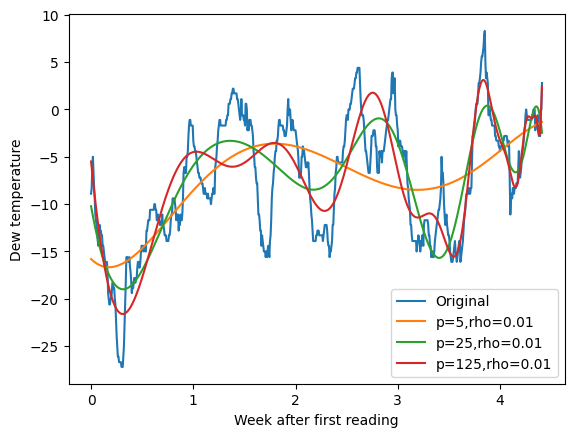

In [9]:
p_values = [5, 25, 125]
rho = .01  # ρ

plt.plot(weeks_after_start, dewtemp, label='Original')
for p in p_values:
    X = packX(weeks_after_start, p)
    theta = solveRidgeRegressionSystem(X, dewtemp, rho)
    y = np.matmul(X, theta)
    plt.plot(weeks_after_start, y, label=f'p={p},rho=0.01')
plt.xlabel('Week after first reading')
plt.ylabel('Dew temperature')
plt.legend()
plt.show()